# **Liner Regression Bank Central Indonesi Discount Rate**
---
FREE DATA FROM WORLD BANK VIA GAPMINDER.ORG, CC-BY LICENSE





In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [196]:
df = pd.read_csv('/content/central_bank_discount_rate_annual_percent.csv')
df.head()

,country,1948,1949,1950,1951,1952,1953,1954,1955,1956,...,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,10.0,7.0,7.0,7.0,7.0,5.0,5.0,5.0,5.0
1,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,58.0,120.0,150.0,150.0,150.0,150.0,95.0,95.0,14.0
2,Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.0,8.0,8.0,8.0,7.0,7.0,7.0,7.0,7.0,7.0
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,32.0,23.0,18.0,11.0,7.0,9.0,7.0,5.0,5.0,6.0
4,Netherlands Antilles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,6.0,6.0,6.0,6.0,6.0,NaN,NaN,NaN,NaN


# **Understanding Data**

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 60 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  146 non-null    object 
 1   1948     27 non-null     float64
 2   1949     28 non-null     float64
 3   1950     30 non-null     float64
 4   1951     32 non-null     float64
 5   1952     33 non-null     float64
 6   1953     33 non-null     float64
 7   1954     34 non-null     float64
 8   1955     34 non-null     float64
 9   1956     34 non-null     float64
 10  1957     36 non-null     float64
 11  1958     40 non-null     float64
 12  1959     40 non-null     float64
 13  1960     46 non-null     float64
 14  1961     47 non-null     float64
 15  1962     47 non-null     float64
 16  1963     49 non-null     float64
 17  1964     53 non-null     float64
 18  1965     55 non-null     float64
 19  1966     58 non-null     float64
 20  1967     60 non-null     float64
 21  1968     65 non-

In [198]:
df.describe()

,1948,1949,1950,1951,1952,1953,1954,1955,1956,1957,...,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006
count,27.000000,28.000000,30.000000,32.000000,33.000000,33.000000,34.000000,34.000000,34.000000,36.000000,...,124.000000,124.000000,119.000000,118.000000,119.000000,121.000000,119.000000,117.000000,118.000000,113.000000
mean,3.851852,3.678571,3.933333,3.937500,3.969697,3.848485,3.794118,4.294118,4.617647,5.277778,...,15.435484,15.104839,15.722689,14.906780,14.117647,14.198347,13.126050,10.393162,13.652542,12.646018
std,2.125010,2.019416,2.132399,1.998992,1.960307,1.954501,1.701682,1.661132,1.922982,2.981956,...,15.541835,15.088260,19.203603,20.154102,20.879873,31.711360,30.576538,13.907302,49.857297,46.580368
min,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.500000,2.000000,2.250000,3.000000,3.000000,3.000000,3.000000,3.000000,3.250000,4.000000,...,7.000000,6.000000,6.000000,6.000000,6.000000,6.000000,5.000000,4.000000,4.000000,5.000000
50%,3.000000,3.000000,4.000000,3.500000,4.000000,4.000000,3.000000,4.000000,4.000000,5.000000,...,10.000000,9.000000,9.000000,8.500000,7.000000,7.000000,7.000000,7.000000,6.500000,7.000000
75%,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.750000,6.000000,...,16.000000,17.250000,17.000000,14.000000,13.000000,13.000000,12.000000,12.000000,11.000000,10.000000
max,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,10.000000,9.000000,11.000000,19.000000,...,96.000000,74.000000,120.000000,150.000000,150.000000,316.000000,300.000000,110.000000,540.000000,500.000000


In [199]:
df.isnull().sum()

country      0
1948       119
1949       118
1950       116
1951       114
1952       113
1953       113
1954       112
1955       112
1956       112
1957       110
1958       106
1959       106
1960       100
1961        99
1962        99
1963        97
1964        93
1965        91
1966        88
1967        86
1968        81
1969        78
1970        75
1971        74
1972        73
1973        73
1974        69
1975        68
1976        64
1977        62
1978        60
1979        60
1980        58
1981        57
1982        56
1983        53
1984        53
1985        51
1986        49
1987        49
1988        47
1989        50
1990        49
1991        46
1992        38
1993        32
1994        23
1995        22
1996        21
1997        22
1998        22
1999        27
2000        28
2001        27
2002        25
2003        27
2004        29
2005        28
2006        33
dtype: int64

# **Data Preprocessing**

*   Missing Value
*   Search Data Indonesia





In [200]:
tahun = df.columns[1:]
tahun

Index(['1948', '1949', '1950', '1951', '1952', '1953', '1954', '1955', '1956',
       '1957', '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965',
       '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974',
       '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006'],
      dtype='object')

In [201]:
for discount in tahun:
    df[discount] = df[discount].replace(np.nan,int(0))

In [202]:
df

,country,1948,1949,1950,1951,1952,1953,1954,1955,1956,...,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006
0,Aruba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,10.0,7.0,7.0,7.0,7.0,5.0,5.0,5.0,5.0
1,Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,48.0,58.0,120.0,150.0,150.0,150.0,150.0,95.0,95.0,14.0
2,Anguilla,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,8.0,8.0,8.0,7.0,7.0,7.0,7.0,7.0,7.0
3,Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,32.0,23.0,18.0,11.0,7.0,9.0,7.0,5.0,5.0,6.0
4,Netherlands Antilles,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,6.0,6.0,6.0,6.0,6.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,Vanuatu,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,6.0,6.0
142,Yemen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.0,20.0,19.0,16.0,15.0,13.0,0.0,0.0,0.0,0.0
143,South Africa,3.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,5.0,...,16.0,19.0,12.0,12.0,10.0,14.0,8.0,8.0,7.0,9.0
144,Zambia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.0,0.0,33.0,26.0,40.0,28.0,14.0,17.0,15.0,9.0


In [203]:
df.isnull().sum()

country    0
1948       0
1949       0
1950       0
1951       0
1952       0
1953       0
1954       0
1955       0
1956       0
1957       0
1958       0
1959       0
1960       0
1961       0
1962       0
1963       0
1964       0
1965       0
1966       0
1967       0
1968       0
1969       0
1970       0
1971       0
1972       0
1973       0
1974       0
1975       0
1976       0
1977       0
1978       0
1979       0
1980       0
1981       0
1982       0
1983       0
1984       0
1985       0
1986       0
1987       0
1988       0
1989       0
1990       0
1991       0
1992       0
1993       0
1994       0
1995       0
1996       0
1997       0
1998       0
1999       0
2000       0
2001       0
2002       0
2003       0
2004       0
2005       0
2006       0
dtype: int64

In [204]:
negara = df['country']=='Indonesia'
df[negara]

,country,1948,1949,1950,1951,1952,1953,1954,1955,1956,...,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006
63,Indonesia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.0,38.0,13.0,15.0,18.0,13.0,8.0,7.0,13.0,10.0


## **Export Data to Excel**

In [205]:
pip install xlwt

In [206]:
import xlwt
df.to_excel('Bank Central Discount.xlsx')

# **Data Processing**

In [207]:
disc = df.iloc[63][1:].values
disc = disc.astype(int)
disc

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, 19, 18, 14,  9, 12, 14, 13, 20, 38,
       13, 15, 18, 13,  8,  7, 13, 10])

In [208]:
tahun = np.array(range(int(df.columns[1:].min()),int(df.columns[1:].max())+1))
tahun

array([1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958,
       1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969,
       1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006])

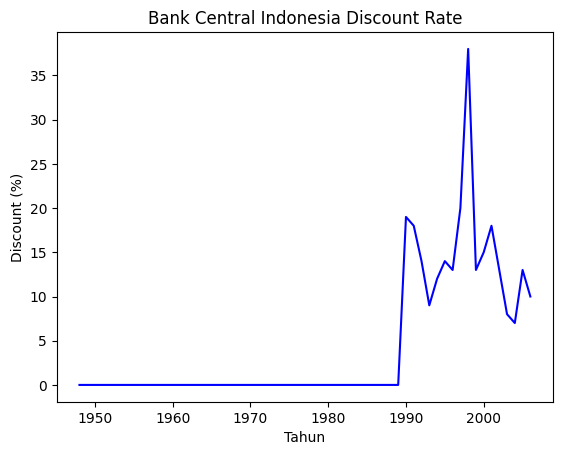

In [209]:
plt.plot(tahun,disc,'b-')
plt.title('Bank Central Indonesia Discount Rate')
plt.xlabel('Tahun')
plt.ylabel('Discount (%)')
plt.show()

In [210]:
df = pd.DataFrame()
df['Year'] = tahun
df['Discount Rate'] = disc
df.head()

,Year,Discount Rate
0,1948,0
1,1949,0
2,1950,0
3,1951,0
4,1952,0


In [211]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df[['Year']]
y = df['Discount Rate']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [212]:
print('Original Training Data: ', X.shape)
print('Original Target Value: ', y.shape)

print('Training Data: ', X_train.shape)
print('Target Value (Training): ', y_train.shape)

print('Testing Data: ', X_test.shape)
print('Target Value (Testing): ', y_test.shape)

Original Training Data:  (59, 1)
Original Target Value:  (59,)
Training Data:  (47, 1)
Target Value (Training):  (47,)
Testing Data:  (12, 1)
Target Value (Testing):  (12,)


# **Linier Regression**

*   MSE = 22.24
*   RMSE = 4.71
*   R2 Score = 0.62





In [213]:
model = LinearRegression()
model.fit (X_train, y_train)

prediksi= model.predict(X_test)

In [214]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, prediksi)
rmse = mean_squared_error(y_test, prediksi, squared=False)

print('Mean Squared Error (MSE): ', mse)
print('Root Mean Squared Error (RMSE): ', rmse)

Mean Squared Error (MSE):  22.246056697767273
Root Mean Squared Error (RMSE):  4.716572558306219


In [215]:
from sklearn.metrics import r2_score

r2score = r2_score(y_test, prediksi)
print("R2 Score =", r2score )

R2 Score = 0.6259420639329183


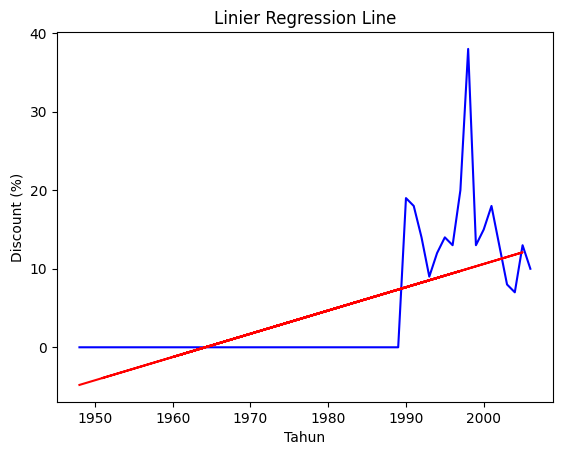

In [216]:
import matplotlib.pyplot as plt

plt.plot(df['Year'], df['Discount Rate'], 'b-')
plt.plot(X_test, prediksi, 'r-')
plt.title('Linier Regression Line')
plt.xlabel('Tahun')
plt.ylabel('Discount (%)')
plt.show()